#### 181805057 - Kardelen Gel
#### 181805067 - Buse Latife Beker

## Indoor Model in the Coppeliasim Simulator

![](house_plan.png)

## Mobile Robot

![](robot.png)

## 2D Map 

![](2D_Map.png)

### Python Code for Mapping

In [ ]:
import vrep
import matplotlib.pyplot as plt
import time
import numpy as np
import math
from pynput import keyboard

In [ ]:
ip = "127.0.0.1"
port = 19999

print('Connecting')
vrep.simxFinish(-1)
clientID = vrep.simxStart(ip, port, True, True, 5000, 5)
activate = True
if(clientID == -1):
    print("Not connected")
    activate = False
print("Connected")

_, camLeft = vrep.simxGetObjectHandle(clientID, "LeftSensor", vrep.simx_opmode_oneshot_wait)
_, camMid = vrep.simxGetObjectHandle(clientID,"MiddleSensor", vrep.simx_opmode_oneshot_wait)
_, camRight = vrep.simxGetObjectHandle(clientID, "RightSensor", vrep.simx_opmode_oneshot_wait)
_, motorRight = vrep.simxGetObjectHandle(clientID, "DynamicRightJoint", vrep.simx_opmode_oneshot_wait)
_, motorLeft = vrep.simxGetObjectHandle(clientID, "DynamicLeftJoint", vrep.simx_opmode_oneshot_wait)
_, vsensor = vrep.simxGetObjectHandle(clientID, "Vision_sensor", vrep.simx_opmode_oneshot_wait)
_, ultra = vrep.simxGetObjectHandle(clientID, "Proximity_sensor", vrep.simx_opmode_oneshot_wait)
_, linetracer = vrep.simxGetObjectHandle(clientID,"LineTracer", vrep.simx_opmode_oneshot_wait)
_, hokuyo = vrep.simxGetObjectHandle(clientID,"fastHokuyo", vrep.simx_opmode_oneshot_wait)

_, laserF = vrep.simxGetObjectHandle(clientID,"LaserFront", vrep.simx_opmode_oneshot_wait)
_, laserB = vrep.simxGetObjectHandle(clientID,"LaserBack", vrep.simx_opmode_oneshot_wait)

In [ ]:
px = []
py = []

statuskey = ""

def key_press(key):
    global statuskey
    statuskey = str(key)

def rotate_vector(data, angle):
    # make rotation matrix
    theta = np.radians(angle)
    co = np.cos(theta)
    si = np.sin(theta)
    rotation_matrix = np.array(((co, -si), (si, co)))
    # rotate data vector
    rotated_vector = data.dot(rotation_matrix)
    # return index of elbow
    return rotated_vector

listener = keyboard.Listener(on_press=key_press)
listener.start()

time.sleep(1)
lidarmap = []

In [ ]:
if(activate):
    print("begin")
    plt.close('all')
    plt.ion()
    # fig=plt.figure()

    while(1):
        ep, pos = vrep.simxGetObjectPosition(clientID, hokuyo, -1, vrep.simx_opmode_streaming)
        ep, pos_dir = vrep.simxGetObjectPosition(clientID, vsensor, -1, vrep.simx_opmode_streaming)

        dr_x = pos_dir[0]-pos[0]
        dr_y = pos_dir[1]-pos[1]

        dangle = math.atan2(dr_y, dr_x)*180/np.pi
        
        px.append(pos[0])
        py.append(pos[1])
        
        print(px[-1],py[-1])

        if (px[0] == 0) and (py[0] == 0):
            px.pop(0)
            py.pop(0)
            
        data = vrep.simxGetStringSignal(clientID, "measuredDataAtThisTime", vrep.simx_opmode_streaming)

        if len(data) > 0:
            plt.clf()

            measuredData = vrep.simxUnpackFloats(data[1])

            lx = np.array(measuredData[1::3])
            ly = np.array(measuredData[0::3])
            ldata = np.vstack((lx, ly)).T
            rotated_data = rotate_vector(ldata, dangle)+[pos[1], pos[0]]

            try:
                for r in rotated_data:
                    if r.tolist() not in lidarmap:
                        lidarmap.append(r.tolist())
                lmnp = np.array(lidarmap)
                plt.scatter(lmnp[:, 1], lmnp[:, 0], alpha=0.5, label="lidar")
            except:
                print("map not appended")

            plt.scatter(px,py,c="r", alpha=0.5,label="robot")
            plt.arrow(x=pos[0], y=pos[1], dx=dr_x, dy=dr_y, width=.005)
            plt.xlim([-10, 10])
            plt.ylim([-10, 10])
            
            plt.xlabel("X axis")
            plt.ylabel("Y axis")
            plt.title('Initial Lidar Map')
            plt.grid()
            plt.legend()

        plt.grid()
        plt.show()
        plt.pause(0.0001)

        wR = 3
        wL = 3
        if statuskey == "Key.esc":
            break
        elif statuskey == "Key.up":
            wR = 5
            wL = 5
        elif statuskey == "Key.left":
            wR = 0.25
            wL = -0.25
        elif statuskey == "Key.right":
            wR = -0.25
            wL = 0.25
        elif statuskey == "Key.down":
            wR = -0.9
            wL = -0.9
        elif statuskey == "Key.enter":
            wR = 0
            wL = 0
        statuskey = ""

        vrep.simxSetJointTargetVelocity(clientID, motorRight, wR, vrep.simx_opmode_oneshot)
        vrep.simxSetJointTargetVelocity(clientID, motorLeft, wL, vrep.simx_opmode_oneshot)

    vrep.simxFinish(clientID)
    
np.save('lmnpx.npy', lmnp[:, 1], allow_pickle=True)
np.save('lmnpy.npy', lmnp[:, 0], allow_pickle=True)

## Start (Cycle) and End (X) Points on the Map

![](start_end_points.png)

## Shortest Paths Between the Points A and B

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import a_star_module
from scipy import interpolate
import d_star_module
import dijkstra_module
from datetime import datetime, date

show_animation = True

#### Start and end points, grid size and robot radius importing

In [8]:
sx = 0.4
sy = -2
gx = -1.6
gy = 1.7

grid_size = 0.15
robot_radius = 0.15

#### Loading Map Data

In [10]:
ox = np.load('lmnpx.npy')
oy = np.load('lmnpy.npy')

### Shortest Path Between the Points A and B with A* Algorithm

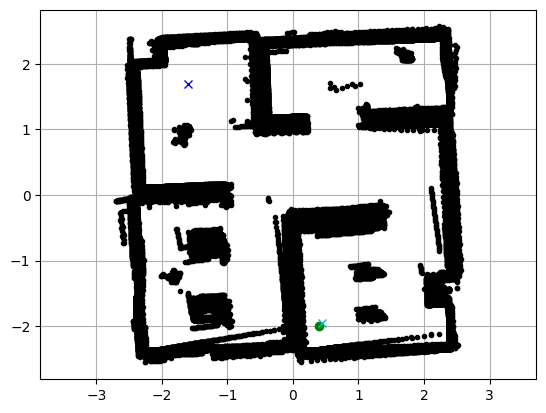

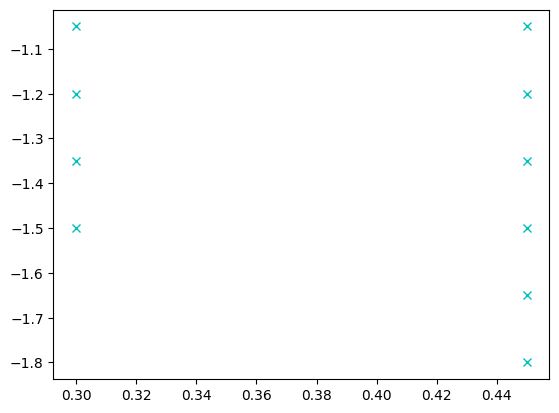

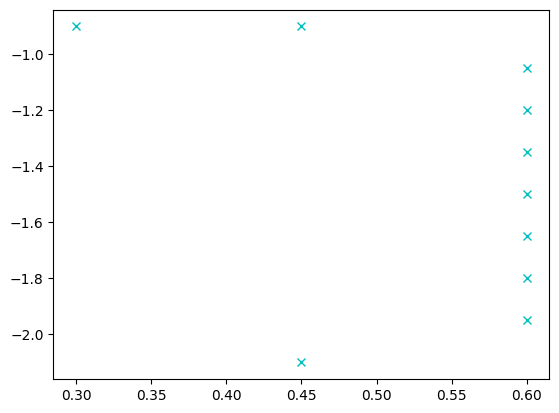

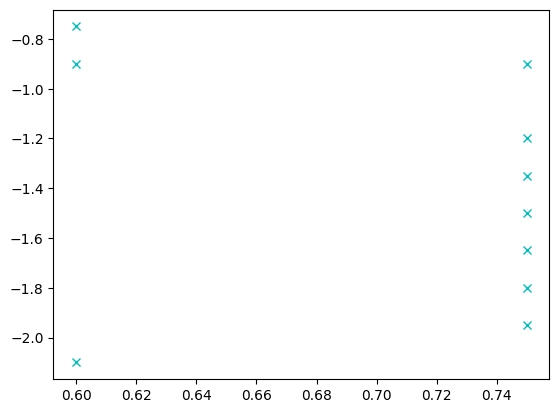

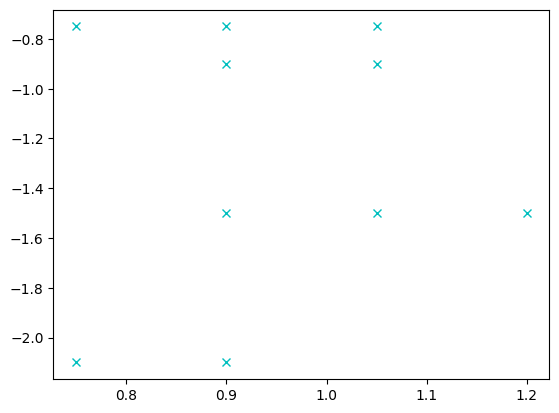

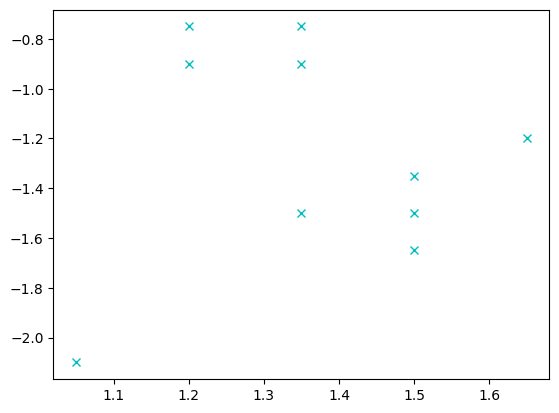

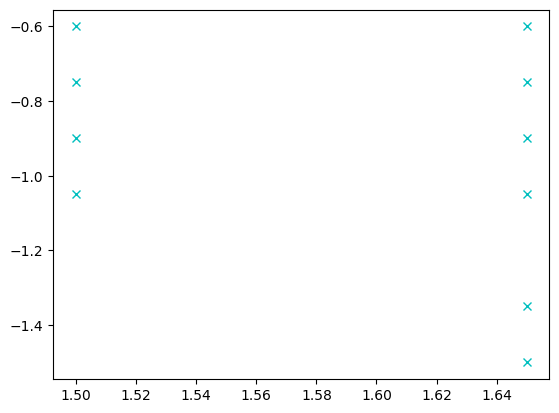

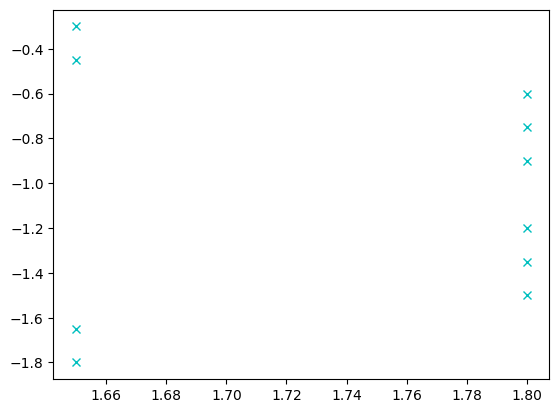

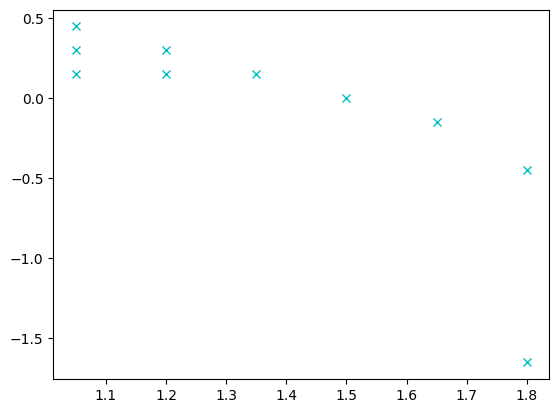

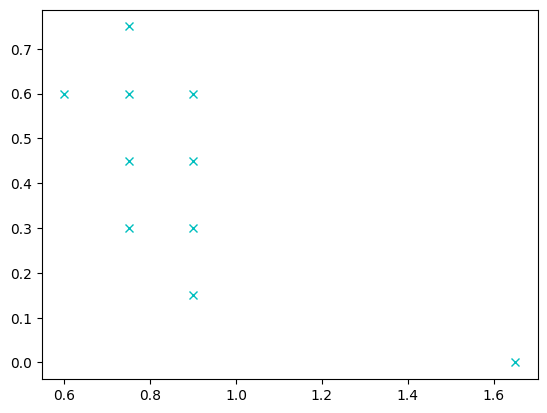

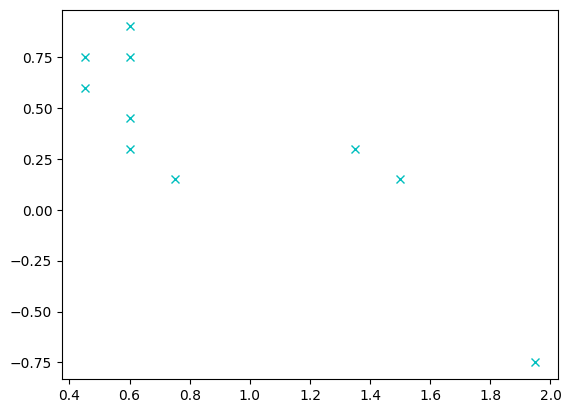

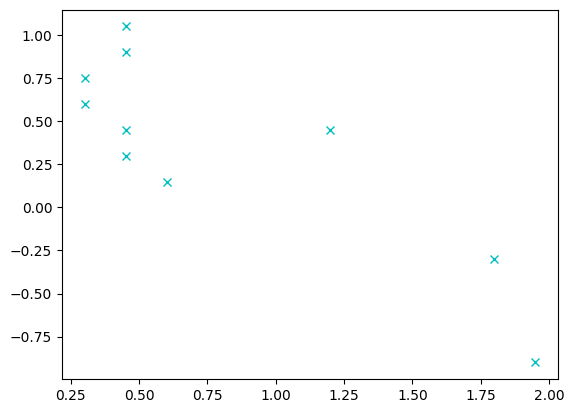

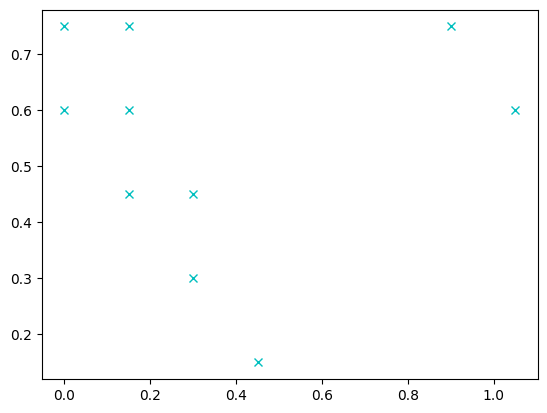

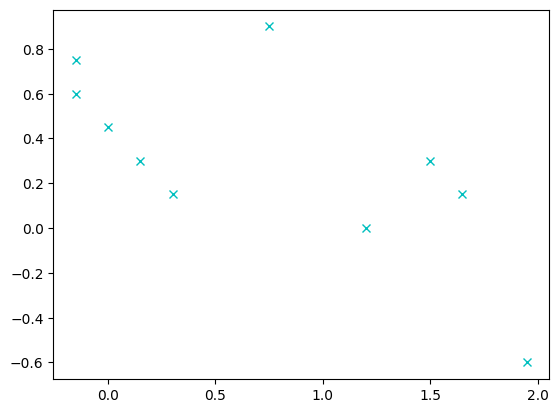

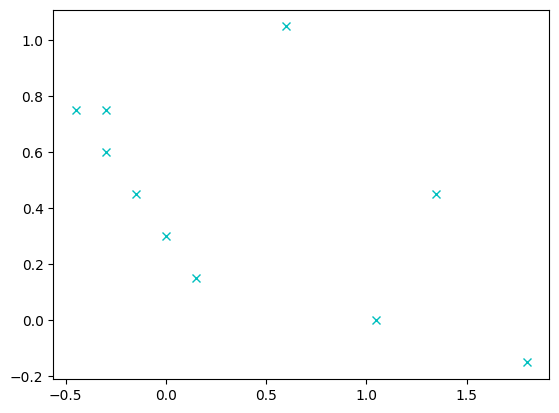

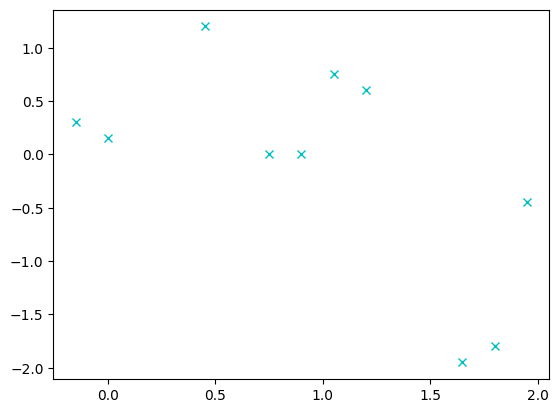

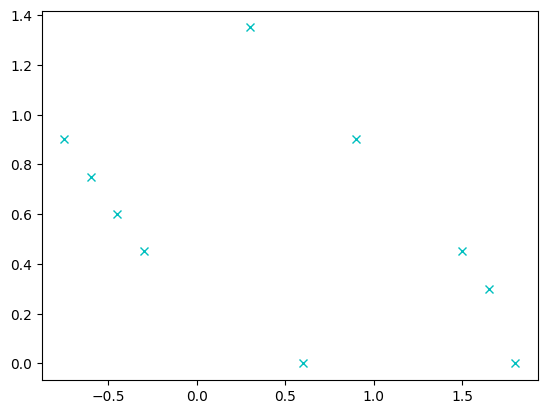

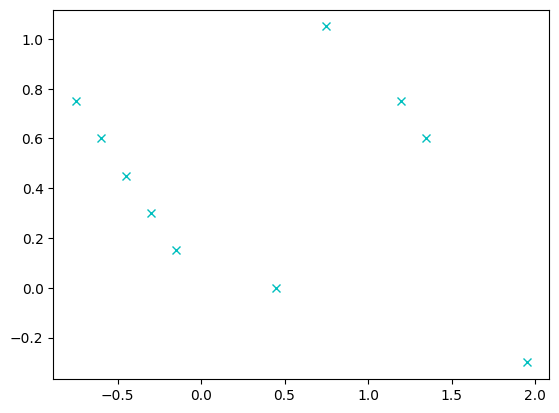

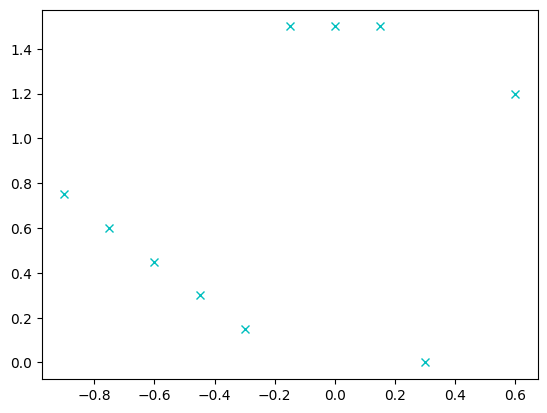

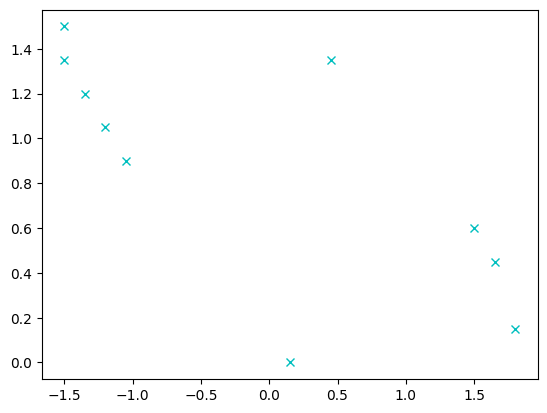

Find goal


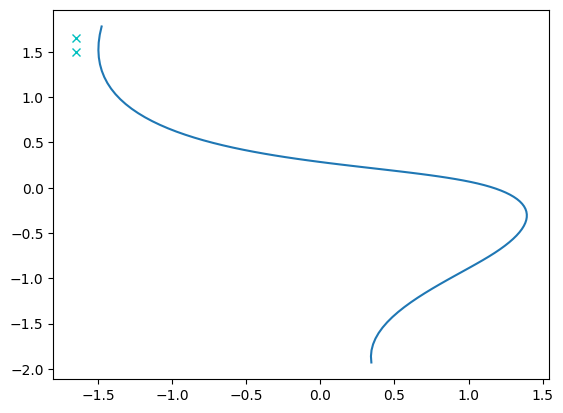

In [12]:
if show_animation:
    plt.plot(ox, oy, ".k")
    plt.plot(sx, sy, "og")
    plt.plot(gx, gy, "xb")
    plt.grid(True)
    plt.axis("equal")

a_star_start_time = datetime.now().time()

a_star = a_star_module.AStarPlanner(ox, oy, grid_size, robot_radius)
rx, ry = a_star.planning(sx, sy, gx, gy)

a_star_end_time = datetime.now().time()

f, u = interpolate.splprep([rx, ry], s=1, per=False)
xint, yint = interpolate.splev(np.linspace(0, 1, 100), f)

plt.plot(xint, yint)
plt.show()

![a star](a_star.gif)

### Shortest Path Between the Points A and B with Dijkstra Algorithm

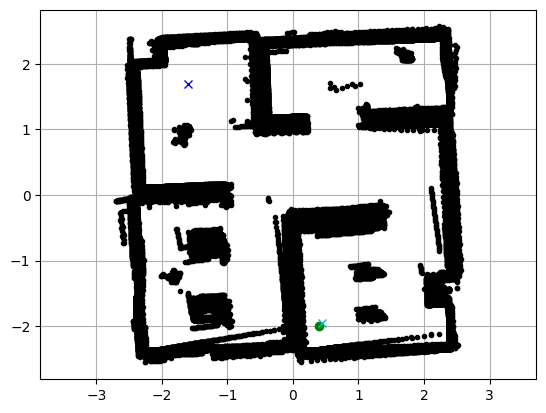

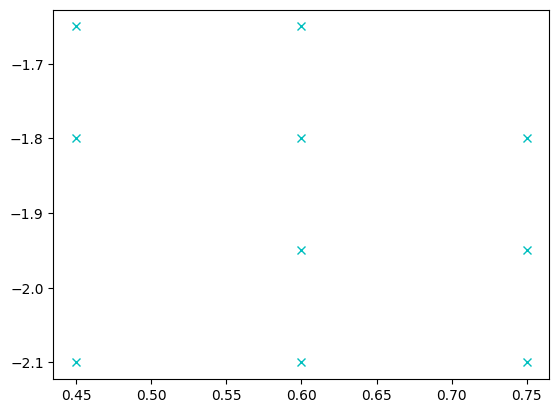

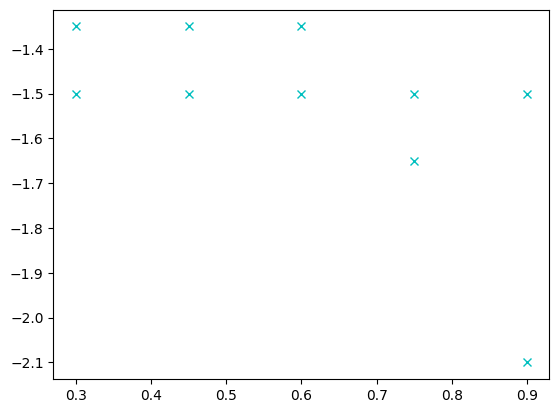

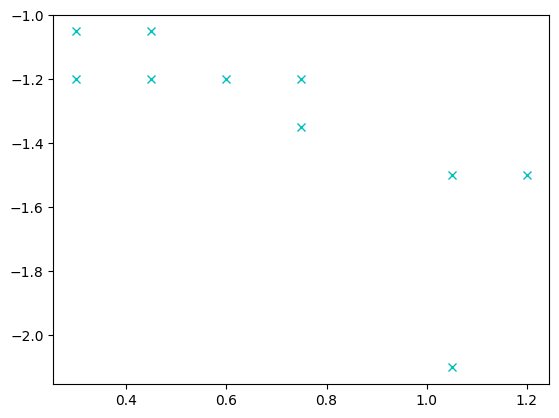

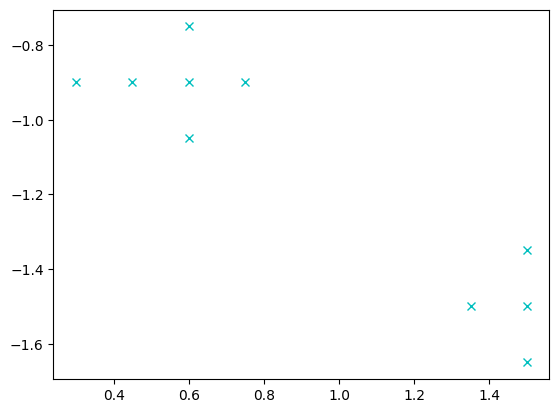

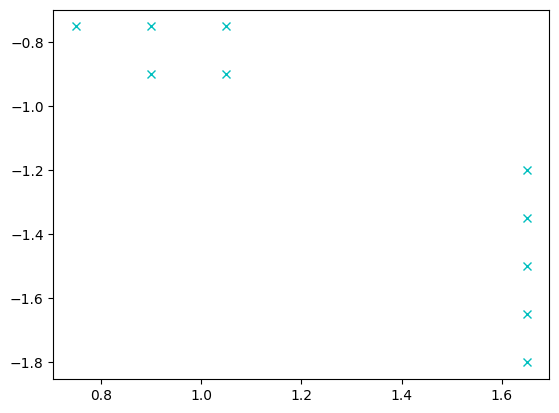

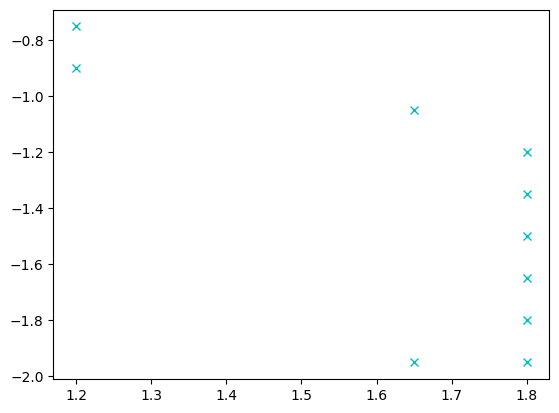

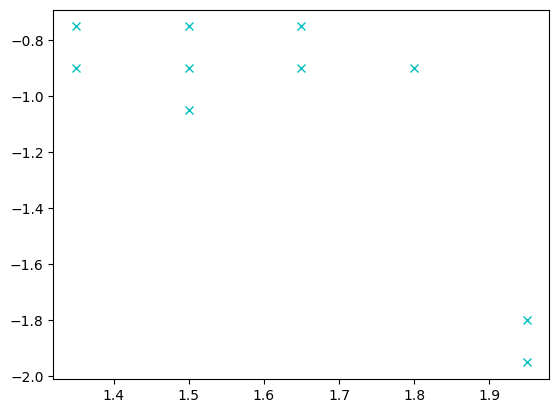

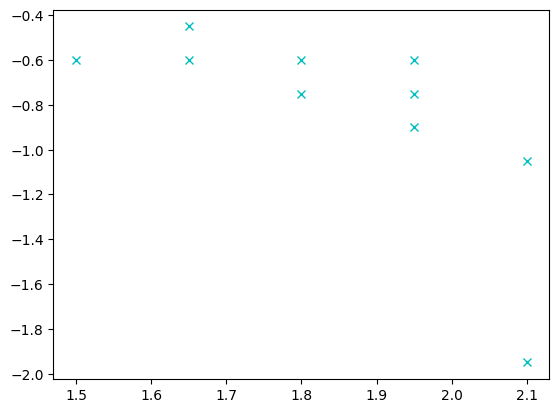

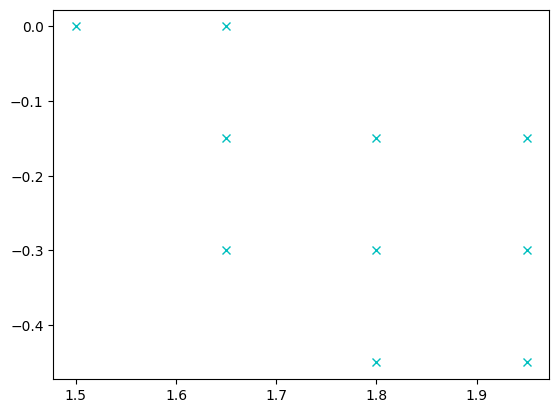

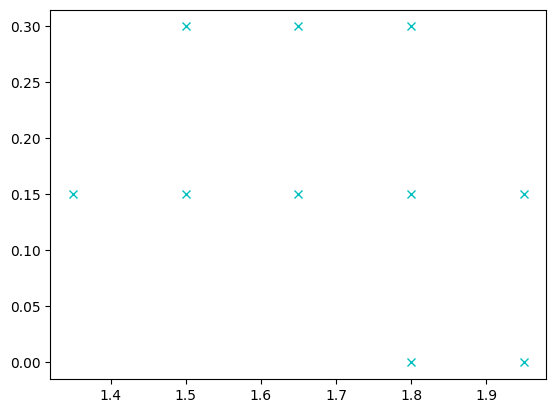

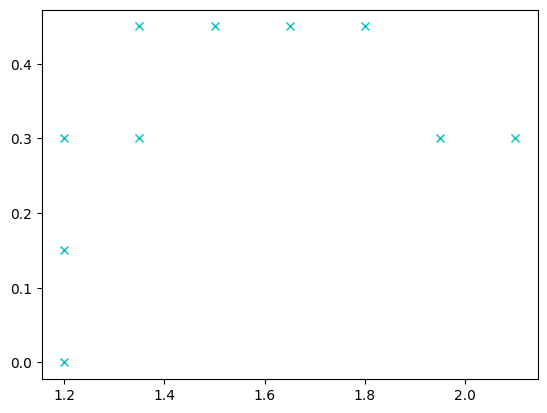

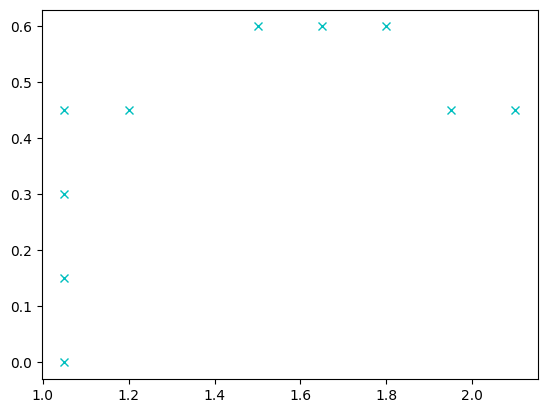

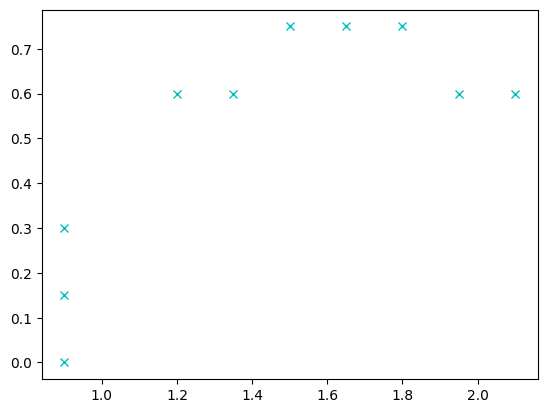

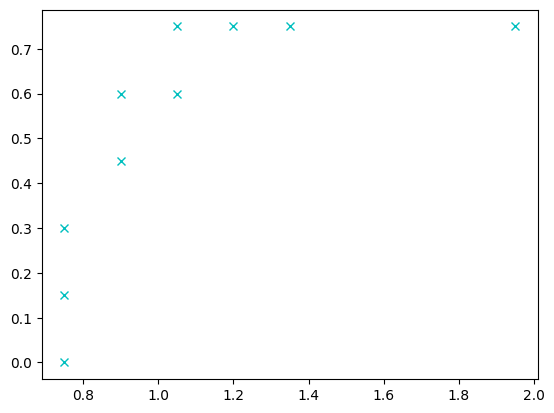

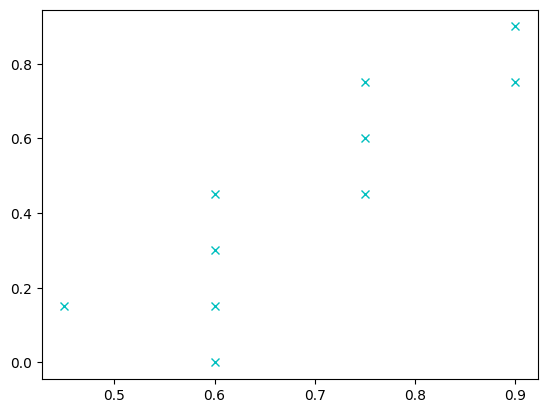

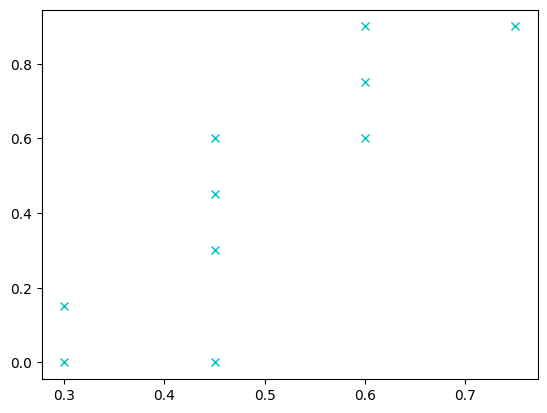

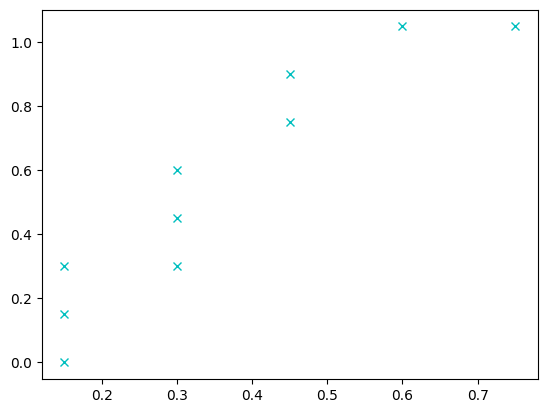

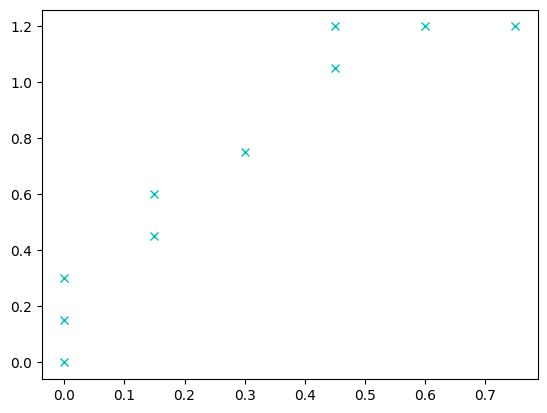

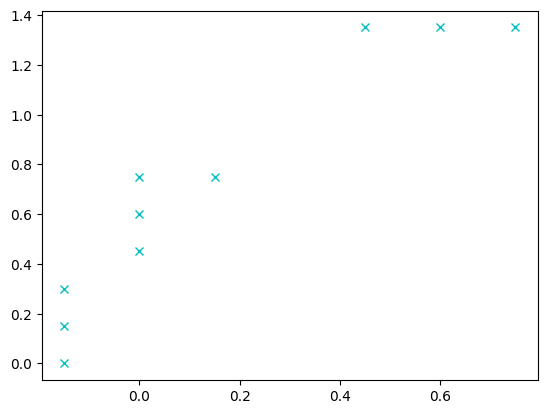

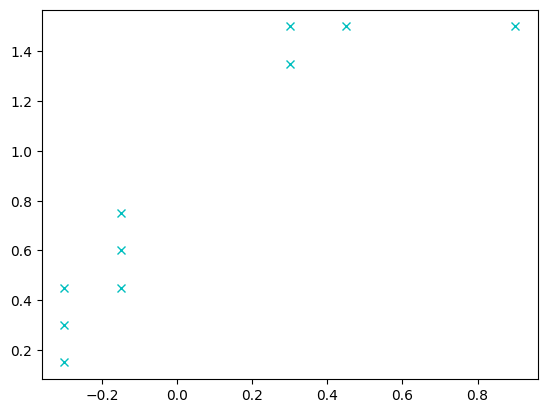

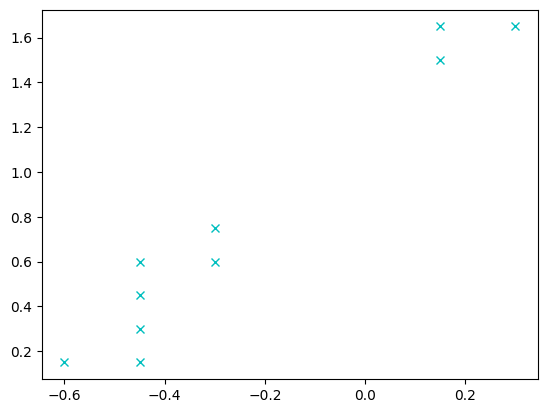

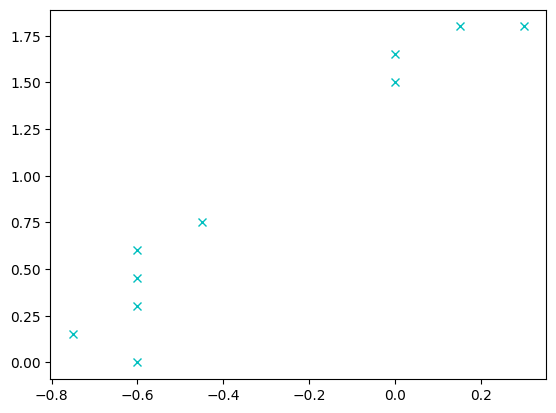

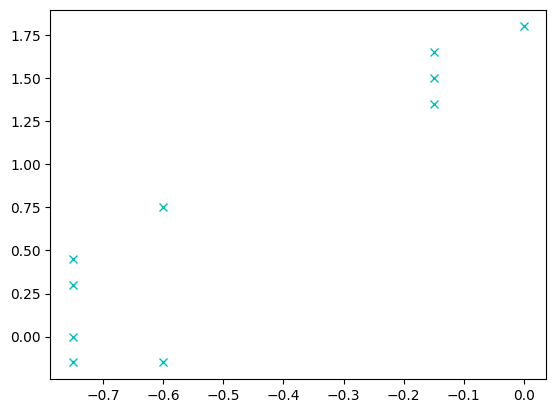

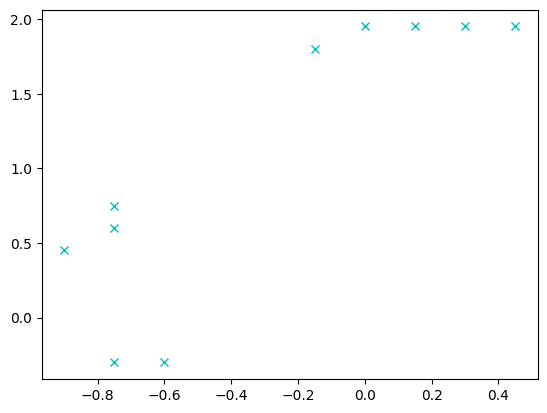

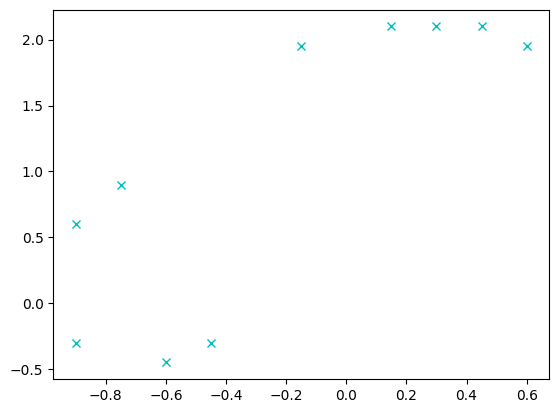

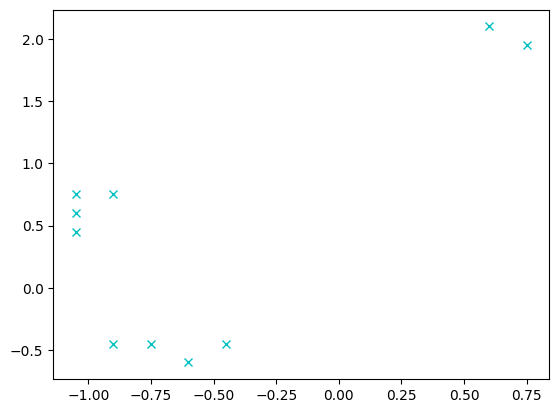

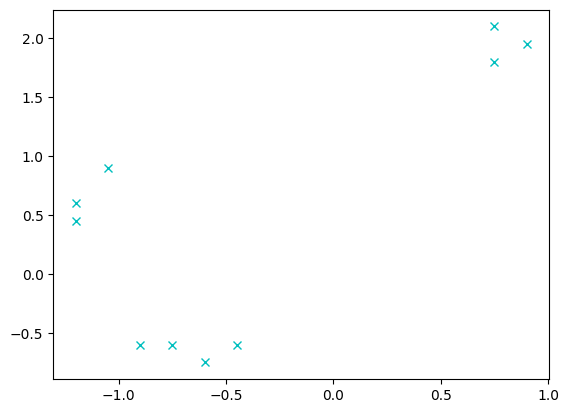

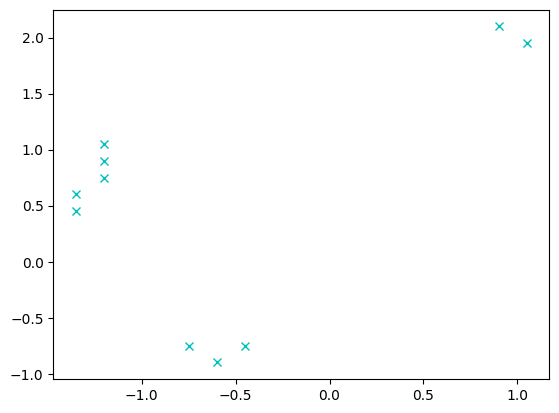

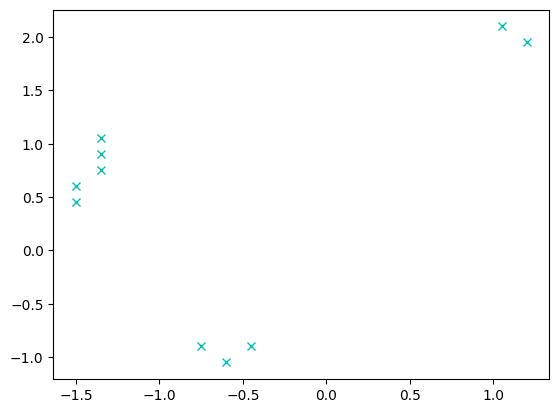

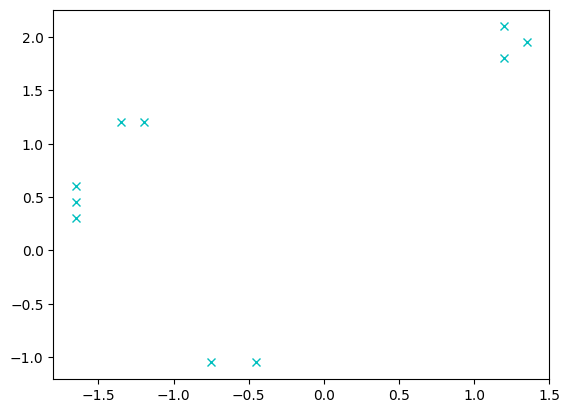

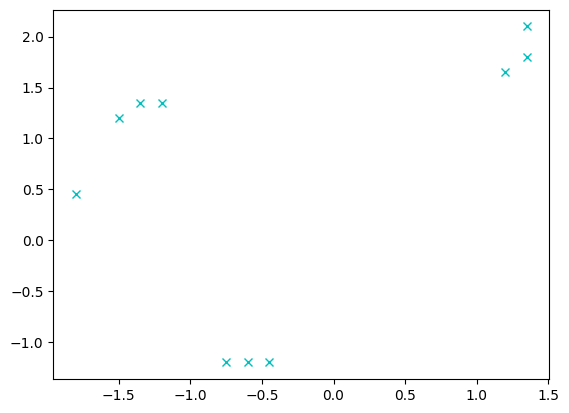

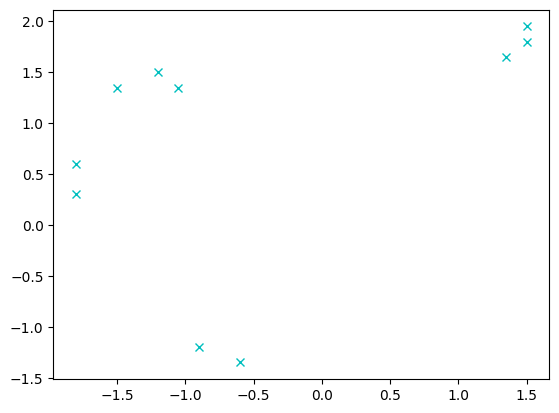

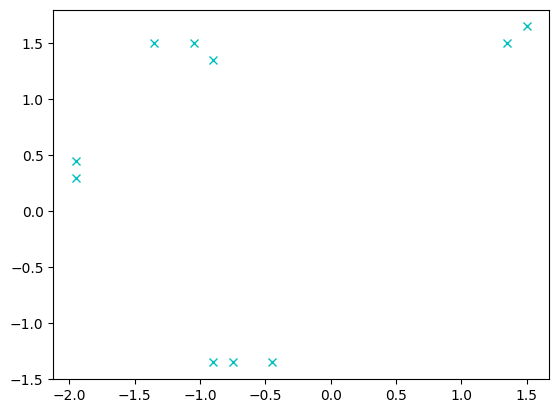

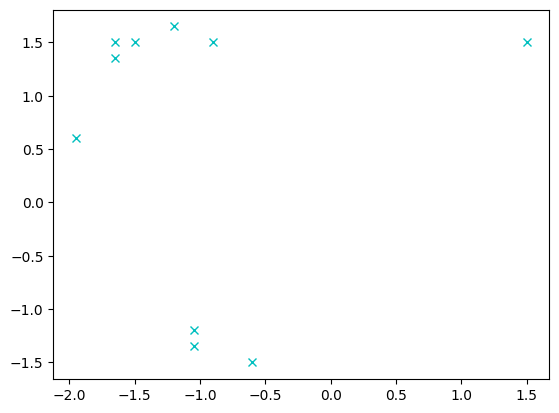

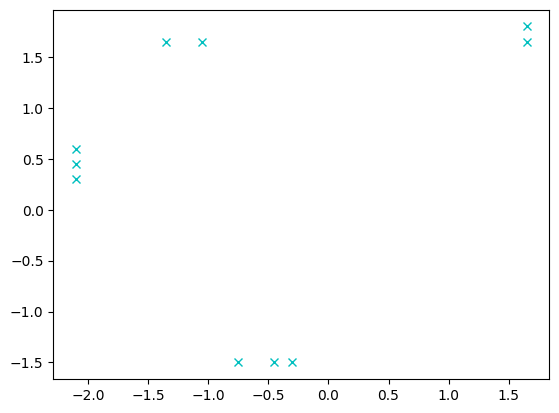

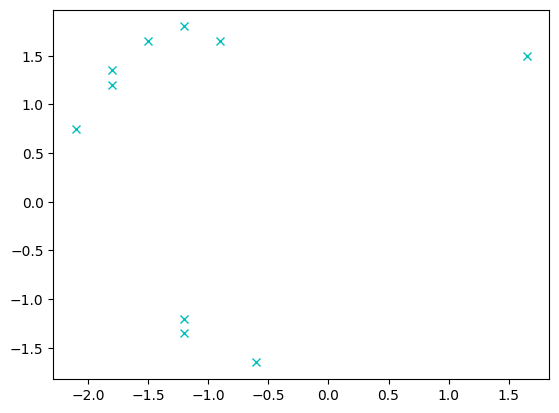

Find goal


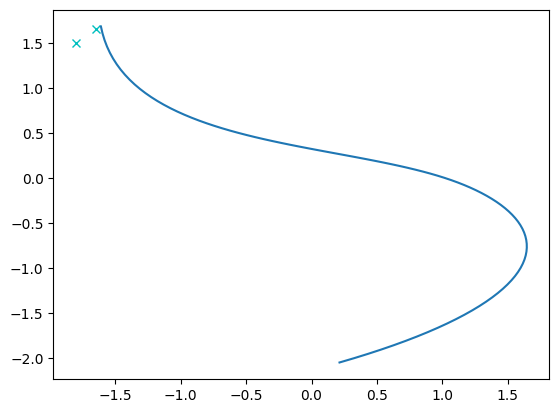

In [14]:
if show_animation:  # pragma: no cover
    plt.plot(ox, oy, ".k")
    plt.plot(sx, sy, "og")
    plt.plot(gx, gy, "xb")
    plt.grid(True)
    plt.axis("equal")

dijkstra_start_time = datetime.now().time()

dijkstra = dijkstra_module.Dijkstra(ox, oy, grid_size, robot_radius)
rx, ry = dijkstra.planning(sx, sy, gx, gy)

dijkstra_end_time = datetime.now().time()

f, u = interpolate.splprep([rx, ry], s=1, per=False)
xint, yint = interpolate.splev(np.linspace(0, 1, 100), f)

plt.plot(xint, yint)
plt.show()

![dijkstra gif](dijkstra.gif)

### Shortest Path Between the Points A and B with D* Algorithm

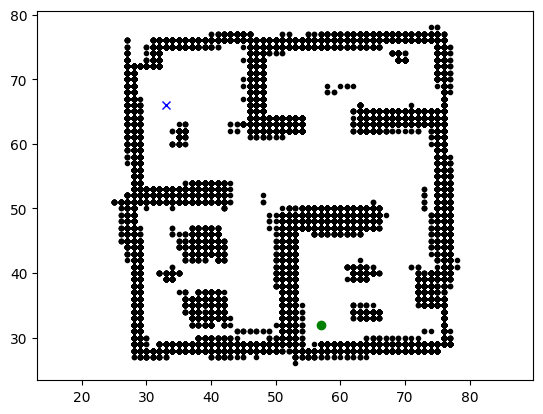

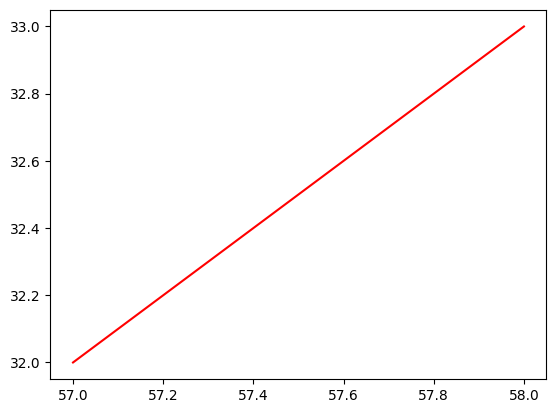

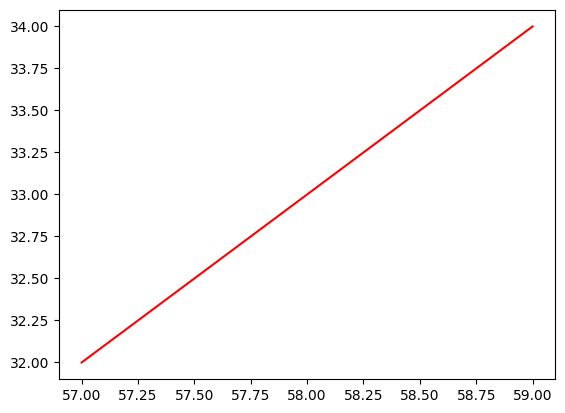

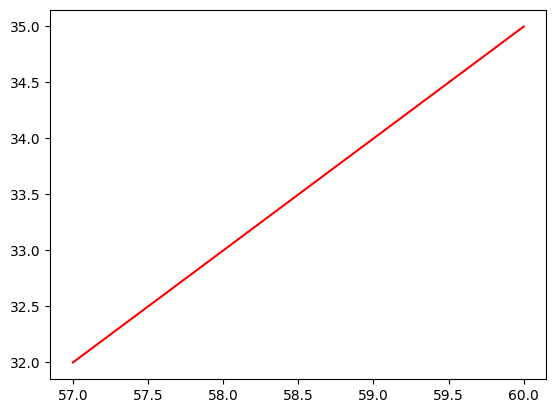

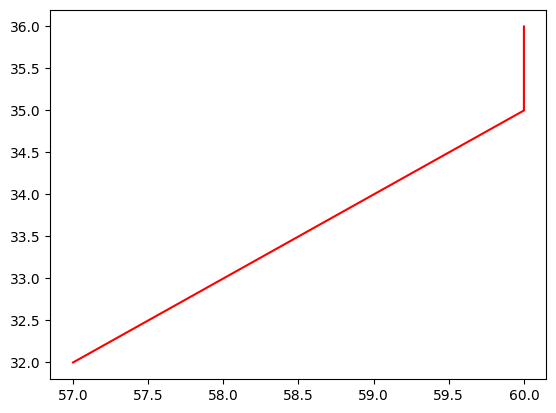

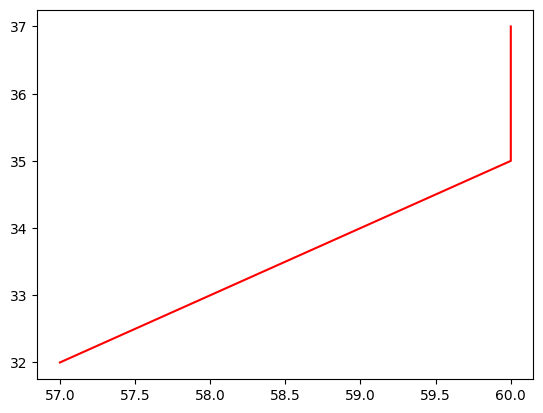

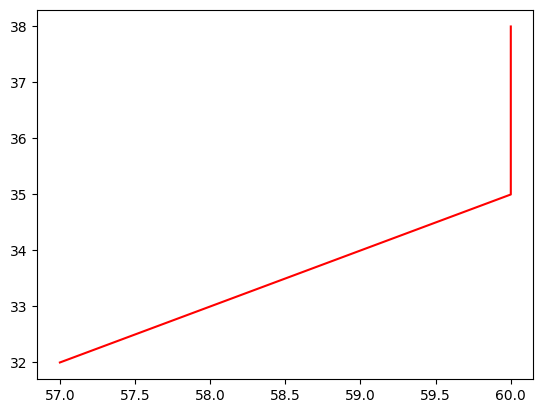

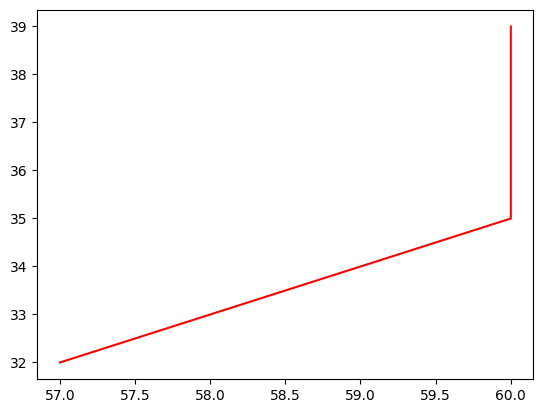

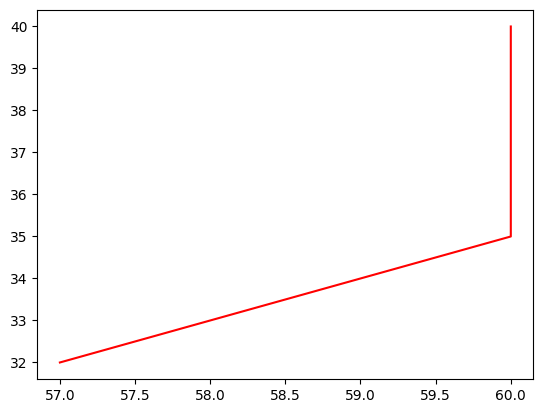

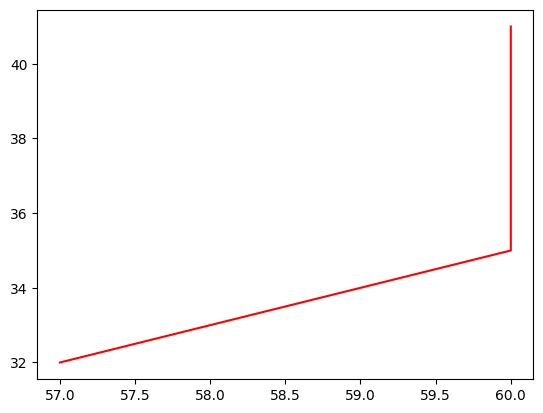

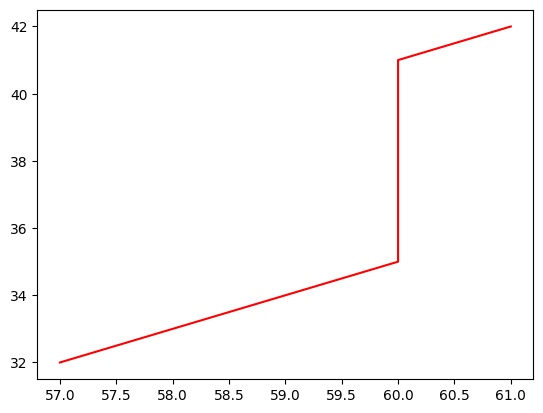

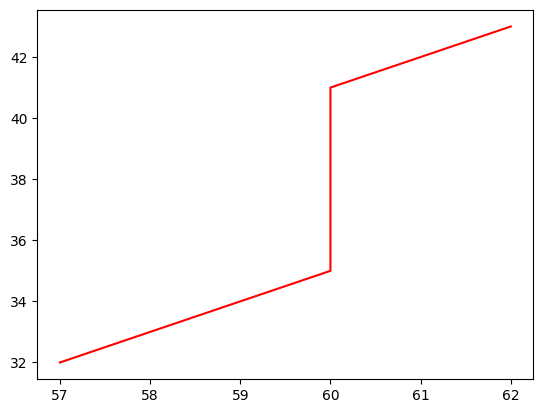

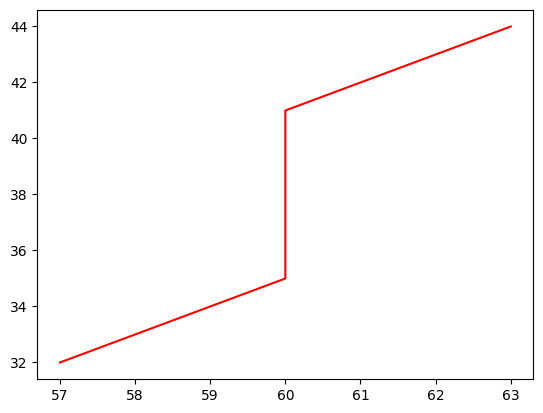

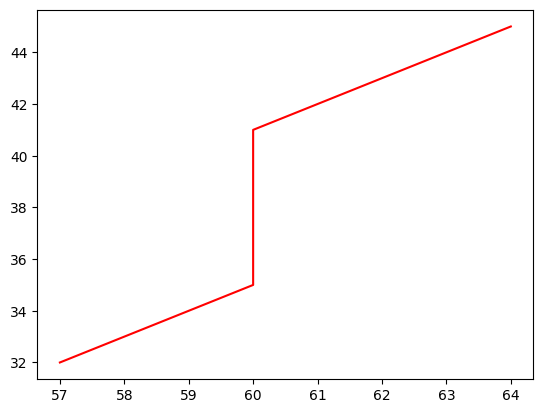

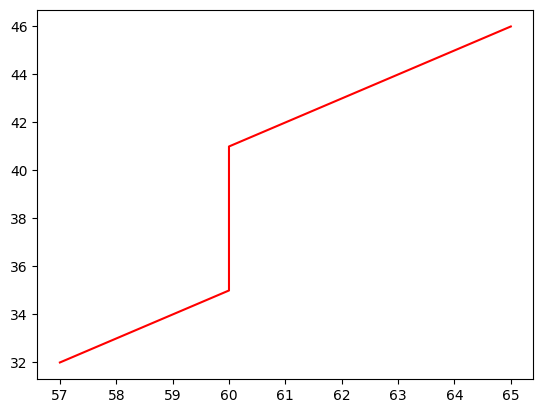

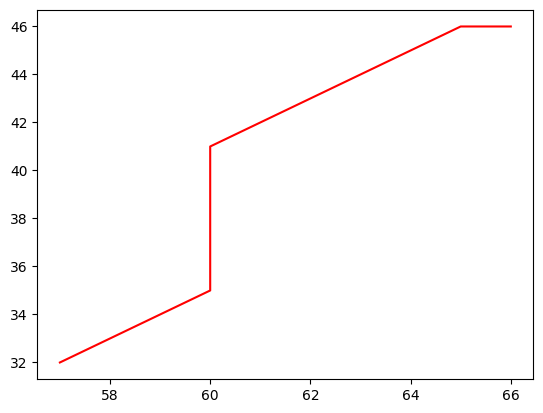

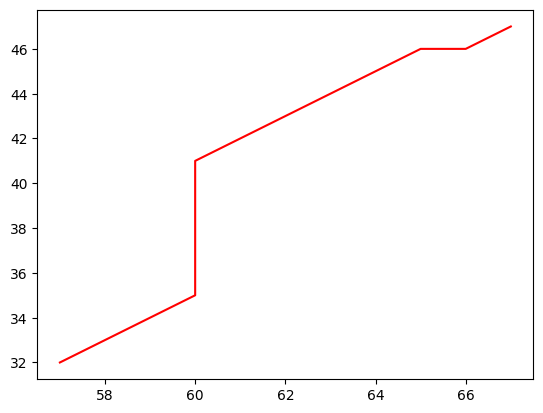

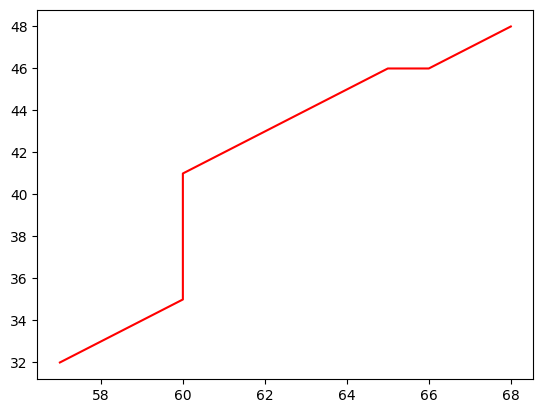

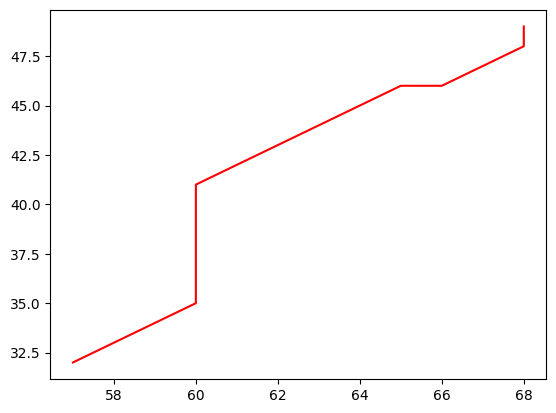

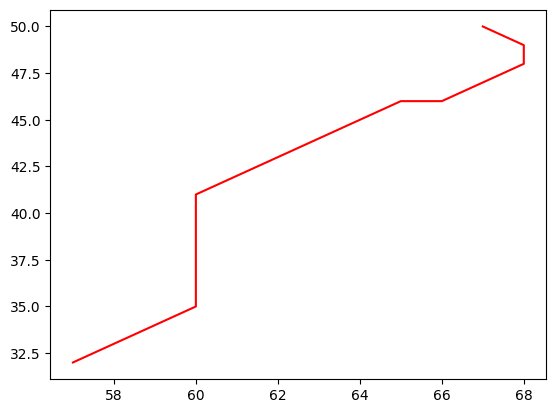

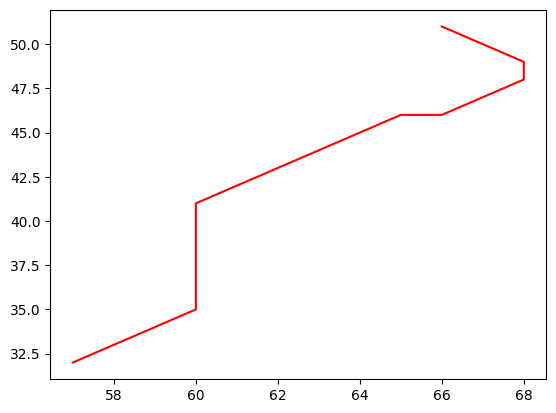

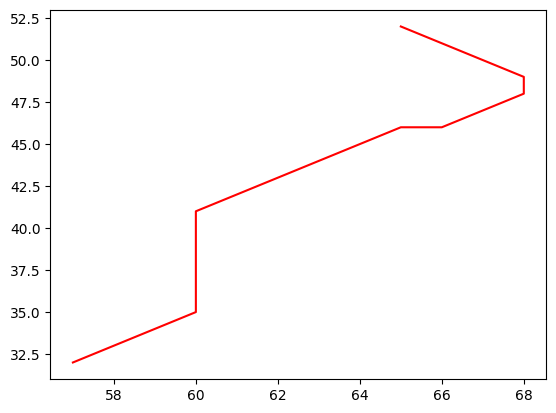

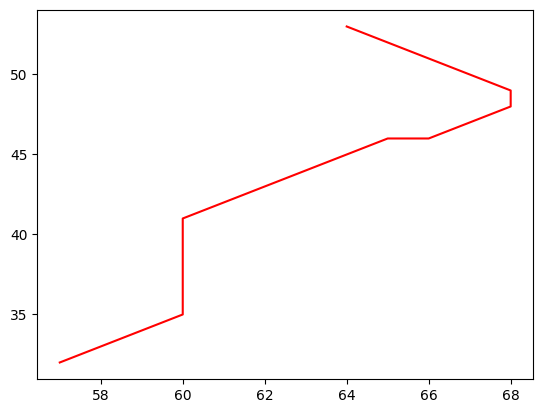

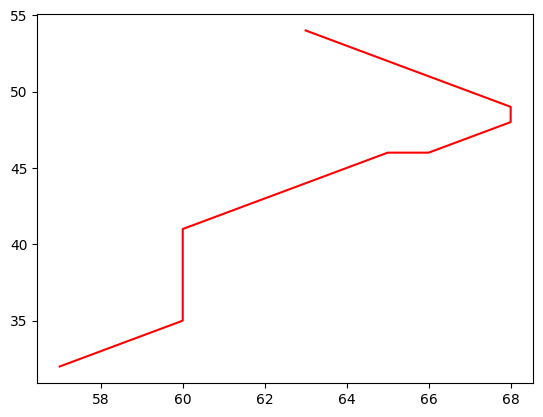

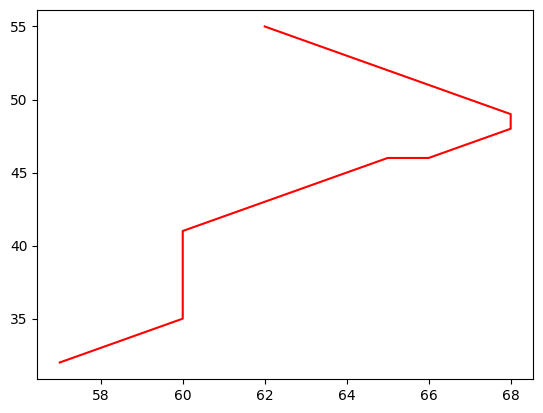

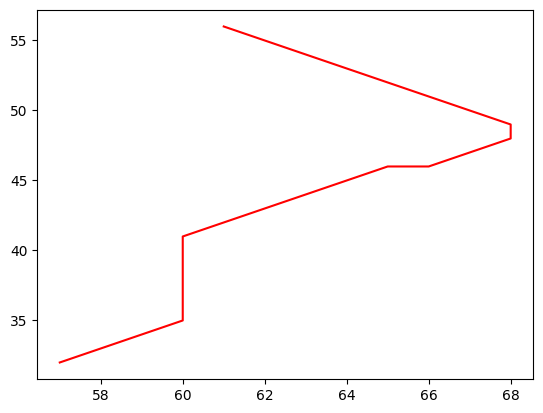

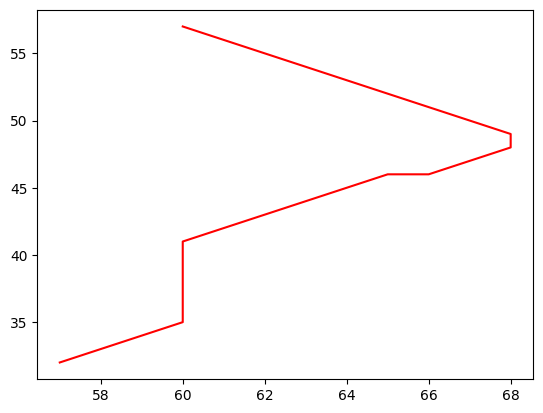

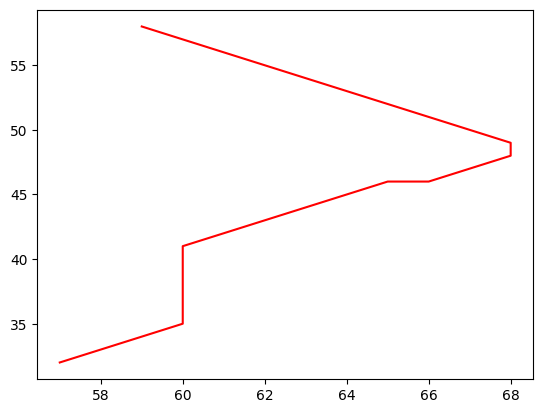

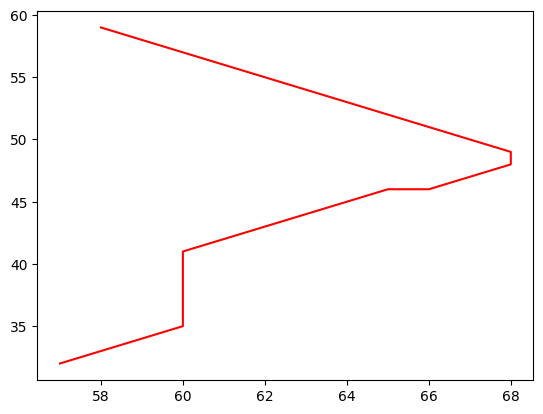

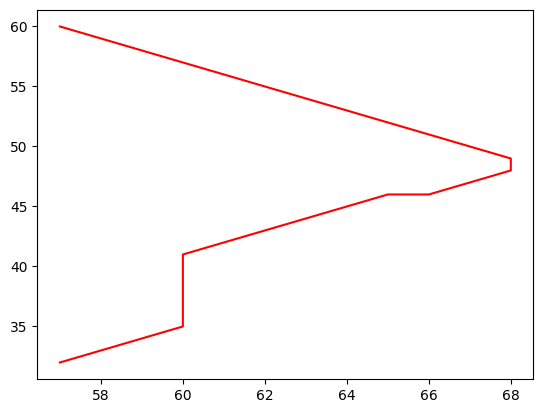

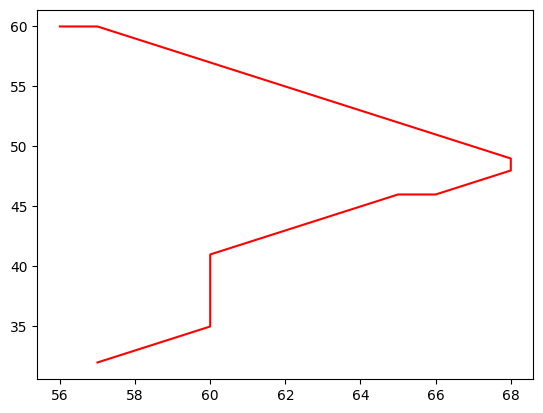

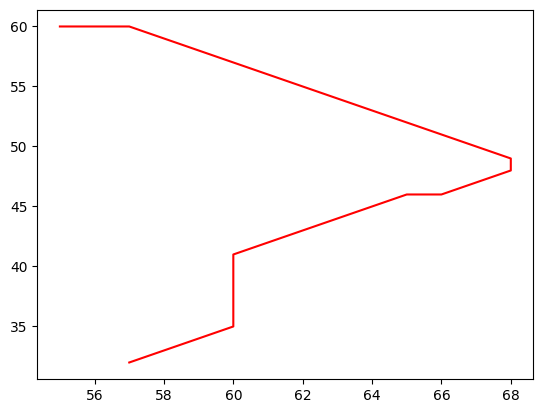

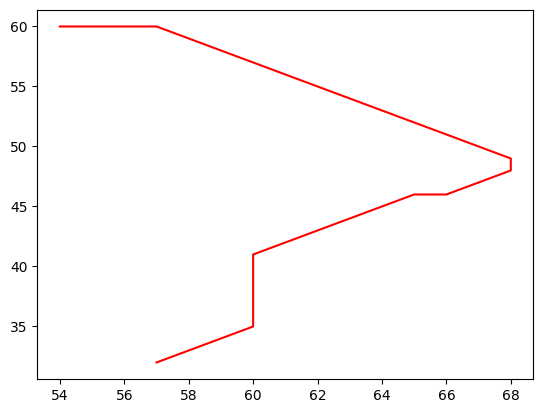

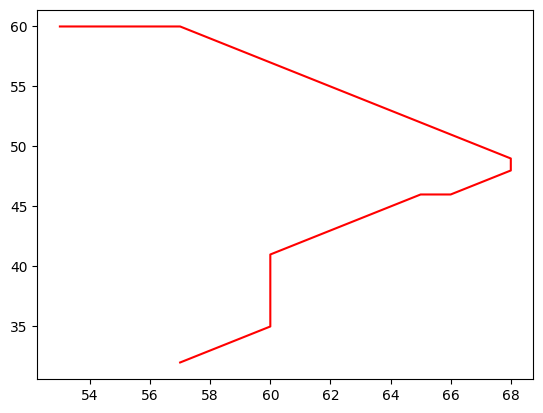

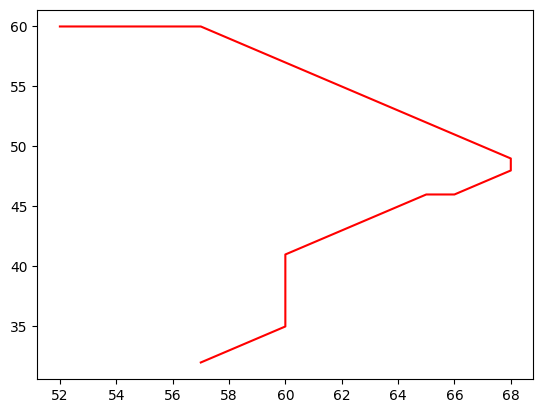

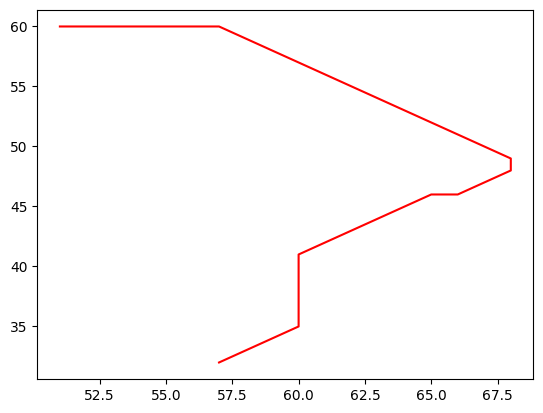

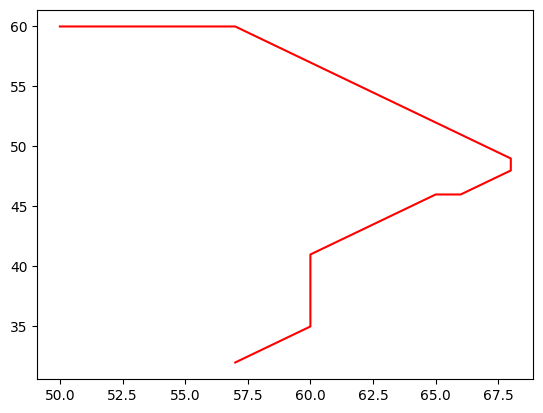

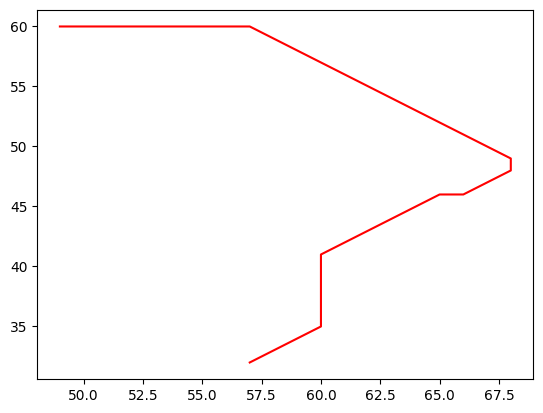

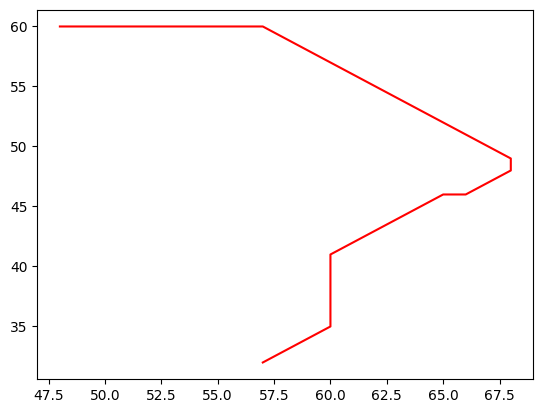

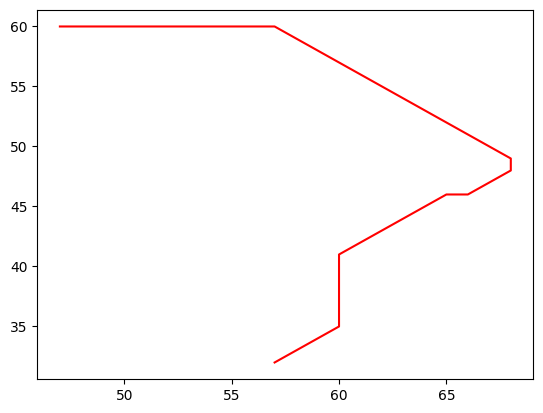

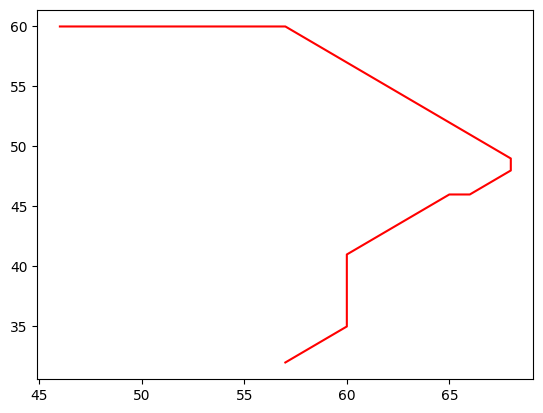

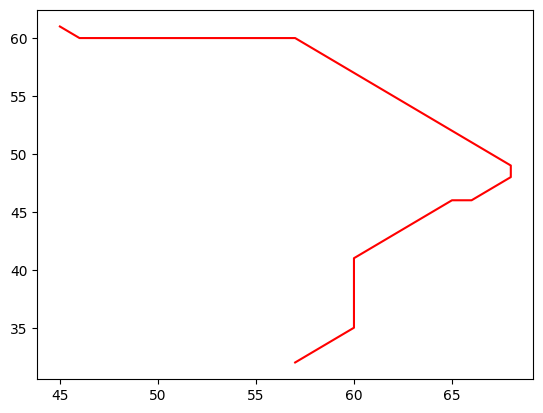

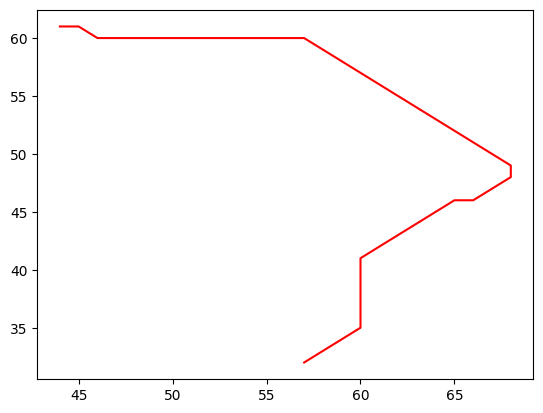

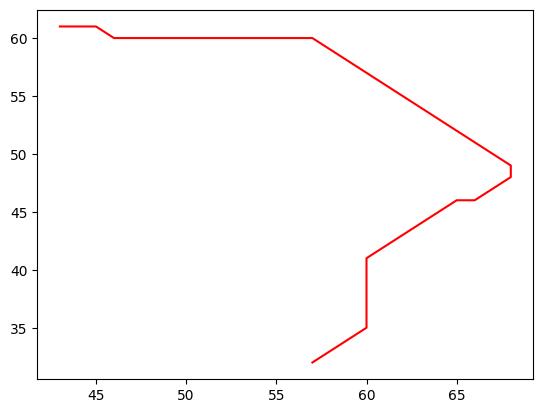

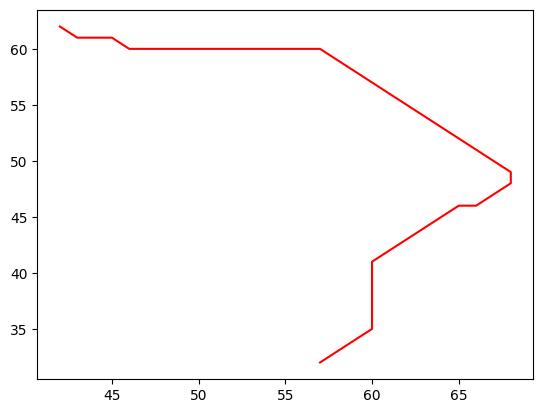

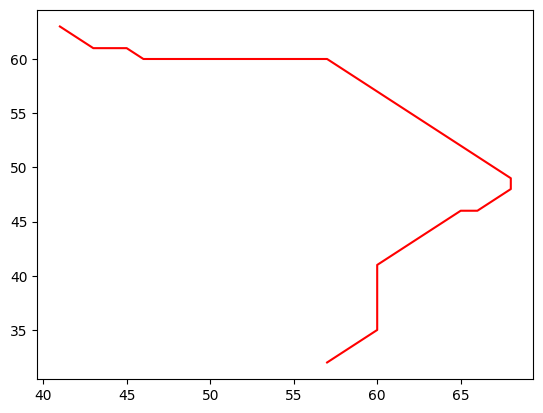

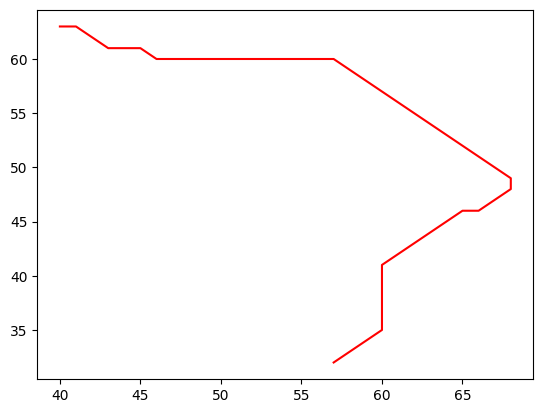

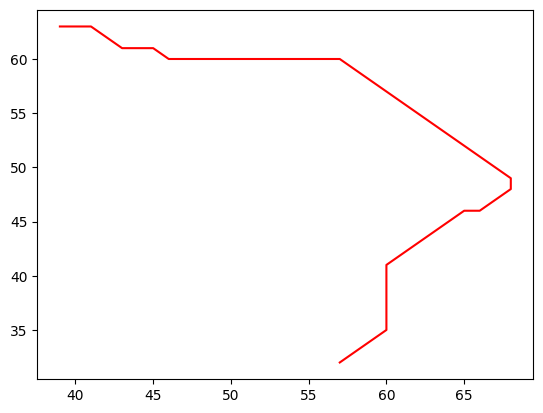

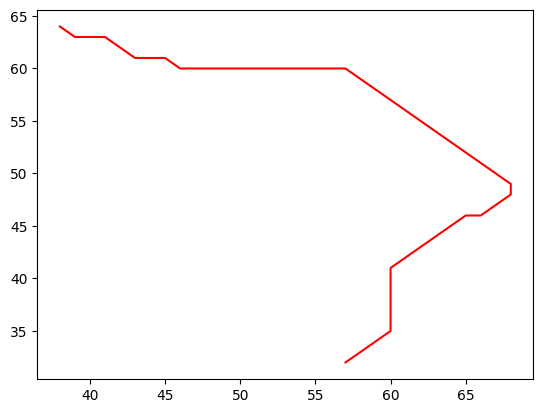

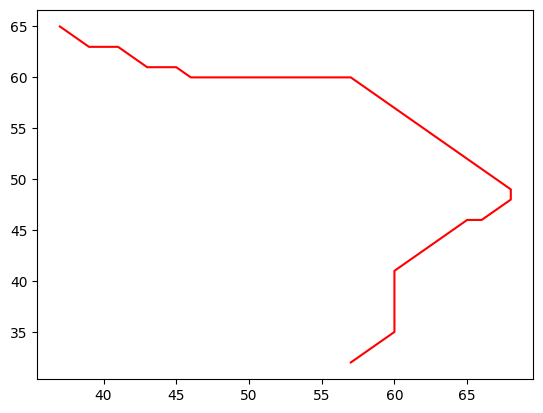

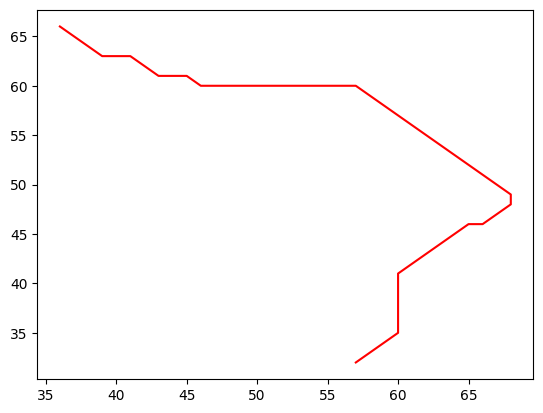

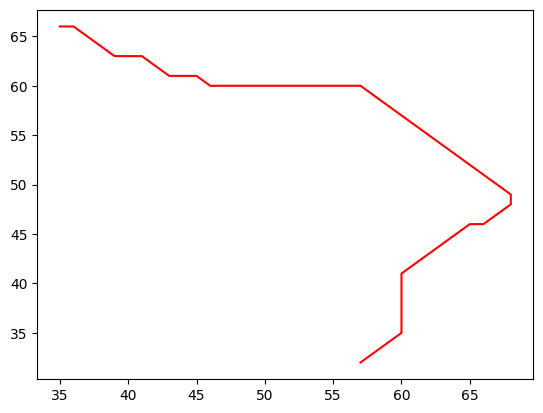

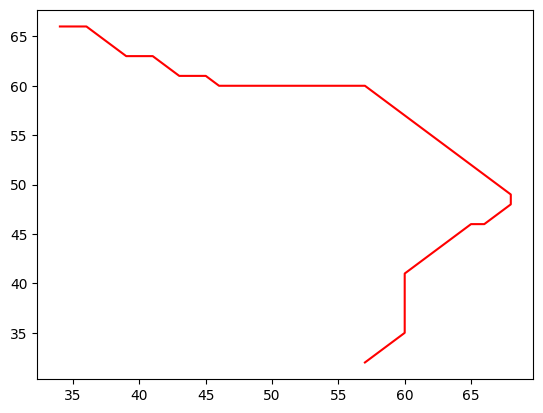

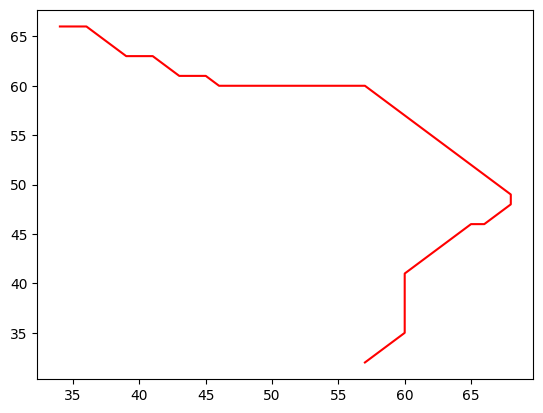

In [5]:
# In this algorithm numbers must be bigger than 0 and they must be integer. Code designed in this way

m = d_star_module.Map(100, 100)

n_ox, n_oy = ox, oy
ox, oy = [], []

for i in n_ox:
    ox.append(round(i*10)+52)
    
for i in n_oy:
    oy.append(round(i*10)+52)

m.set_obstacle([(i, j) for i, j in zip(ox, oy)])


sx = 57
sy = 32
gx = 33
gy = 66


if show_animation:
    plt.plot(ox, oy, ".k")
    plt.plot(sx, sy, "og")
    plt.plot(gx, gy, "xb")
    plt.axis("equal")

start = m.map[sx][sy]
end = m.map[gx][gy]

d_star_start_time = datetime.now().time()

dstar = d_star_module.Dstar(m)
rx, ry = dstar.run(start, end)

d_star_end_time = datetime.now().time()

if show_animation:
    plt.plot(rx, ry, "-r")
    plt.show()

![d star](d_star.gif)

### Time Caculation For Each Algorithm

In [15]:
a_star_duration = datetime.combine(date.min, a_star_end_time) - datetime.combine(date.min, a_star_start_time)
print(f"A* Algorithm       : {a_star_duration}")

dijkstra_star_duration = datetime.combine(date.min, dijkstra_end_time) - datetime.combine(date.min, dijkstra_start_time)
print(f"Dijkstra Algorithm : {dijkstra_star_duration}")

d_star_duration = datetime.combine(date.min, d_star_end_time) - datetime.combine(date.min, d_star_start_time)
print(f"D* Algorithm       : {d_star_duration}")

A* Algorithm       : 0:03:02.044221
Dijkstra Algorithm : 0:02:42.856974
D* Algorithm       : 0:00:24.323888
